In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv(r'C:\da12\projects\un-python-Zavello\data\gdp_percapita.csv')

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

5. How many rows and columns are in `gdp_df`? What are the data types of each column?
   There are 7,662 rows and 4 columns. We have a Object, integer, and two floats to represent the columns.

In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [5]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
gdp_new = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})
gdp = gdp_new.drop(columns=['Value Footnotes'])
print(gdp)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year.
What do you notice?

In [9]:
max_year = gdp['Year'].max()
min_year = gdp['Year'].min()
print(max_year)
print(min_year)

2022
1990


In [126]:
all_year_country = gdp.drop(columns=['GDP_Per_Capita'])
all_year_country = all_year_country.groupby('Country').count()
everyyear_country = all_year_country[all_year_country.Year == 33]
none_all_year = all_year_country[all_year_country.Year != 33]
everyyear_country.info()
none_all_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, Africa Eastern and Southern to Zimbabwe
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    202 non-null    int64
dtypes: int64(1)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, Afghanistan to West Bank and Gaza
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    40 non-null     int64
dtypes: int64(1)
memory usage: 640.0+ bytes


202 countries have data for all years while 40 countries do not.

In [133]:
gdp.groupby('Year').count()

,Country,GDP_Per_Capita
Year,,
1990,207,207
1991,208,208
1992,210,210
1993,211,211
1994,213,213
1995,223,223
1996,223,223
1997,226,226
1998,226,226


There was a increase in countries recording GDP as time went on.

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [13]:
year_2020 = gdp[gdp.Year == 2020]
year_2020 = year_2020.drop(columns=['Year'])
print(year_2020)

                          Country  GDP_Per_Capita
1                     Afghanistan     1968.341002
22    Africa Eastern and Southern     3455.023119
55     Africa Western and Central     3957.933804
88                        Albania    13278.369769
121                       Algeria    10844.770764
...                           ...             ...
7503                     Viet Nam    10450.622382
7536           West Bank and Gaza     5402.538773
7565                        World    16204.169107
7598                       Zambia     3183.650773
7631                     Zimbabwe     1990.319419

[242 rows x 2 columns]


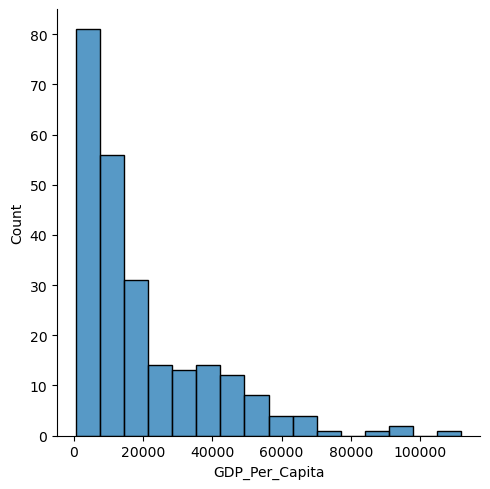

In [14]:
sns.displot(data=year_2020['GDP_Per_Capita'])

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

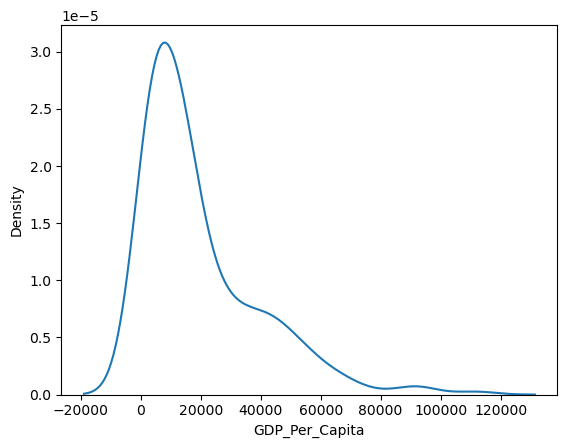

In [15]:
sns.kdeplot(year_2020['GDP_Per_Capita'])

<Axes: ylabel='GDP_Per_Capita'>

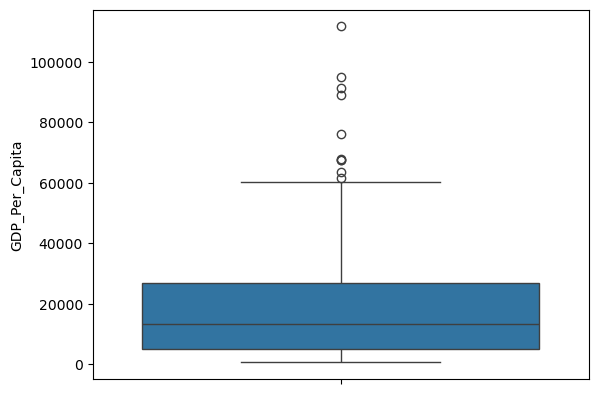

In [16]:
sns.boxplot( y=year_2020['GDP_Per_Capita'])

<Axes: ylabel='GDP_Per_Capita'>

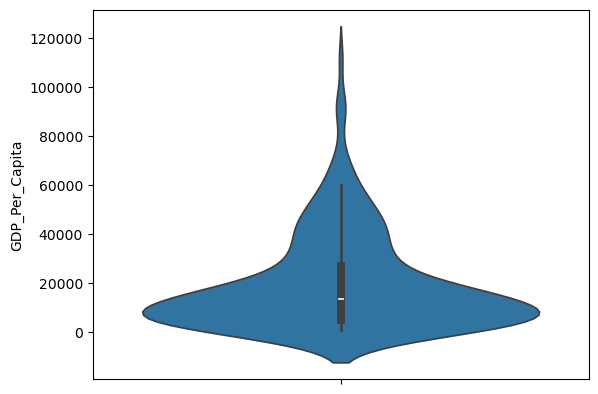

In [17]:
sns.violinplot(y=year_2020['GDP_Per_Capita'])

These plots are made to give you a distribution of the GDP Per Capita for every country in 2020. The Histogram is the only plot that also gives the count of the amount of countries in that bin for their GDP Per Capita. All other plots only have a relative distribution of the data.

9. What was the median GDP per capita value in 2020?

In [20]:
year_2020['GDP_Per_Capita'].median()

13357.997573370474

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.
    The average GPD has increased over time and that is seen mostly by the bar graph.
   The box plot is good to visualize the lowest and highest GDP as well as the trend on the distribution of the GDP per capita among countries.
   The scatter plot is a less detailed visual, you maybe able to show a concentration of data points using this (which  can be as telling as a box plot).

In [22]:
gdp_decades = gdp[(gdp['Year'] == 1990) | (gdp['Year'] ==2000) |  (gdp['Year'] ==2010) | (gdp['Year'] ==2020)]
print(gdp_decades)

                          Country  Year  GDP_Per_Capita
1                     Afghanistan  2020     1968.341002
11                    Afghanistan  2010     2026.163818
22    Africa Eastern and Southern  2020     3455.023119
32    Africa Eastern and Southern  2010     3513.315920
42    Africa Eastern and Southern  2000     2897.140841
...                           ...   ...             ...
7628                       Zambia  1990     2290.039226
7631                     Zimbabwe  2020     1990.319419
7641                     Zimbabwe  2010     1799.540233
7651                     Zimbabwe  2000     2750.601236
7661                     Zimbabwe  1990     2704.757299

[921 rows x 3 columns]


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

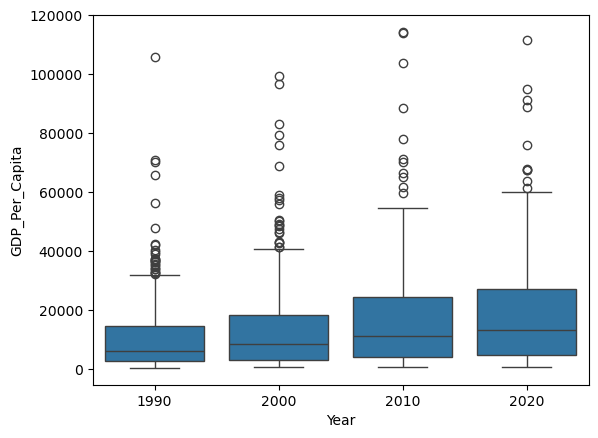

In [23]:
sns.boxplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

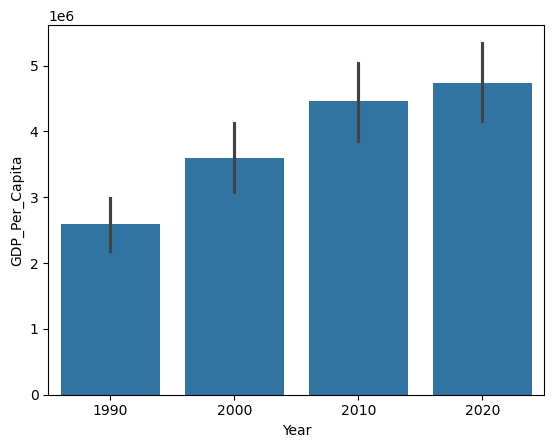

In [24]:
sns.barplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], data=gdp_decades, estimator=sum) #this gives max, I want Sum

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

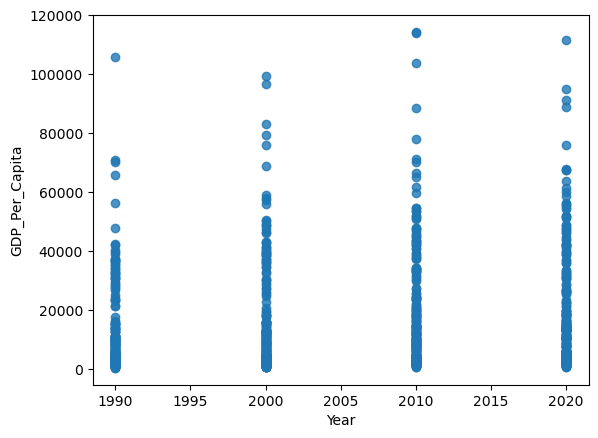

In [25]:
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], fit_reg=False) #alpha=0.05) why is this not working?

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

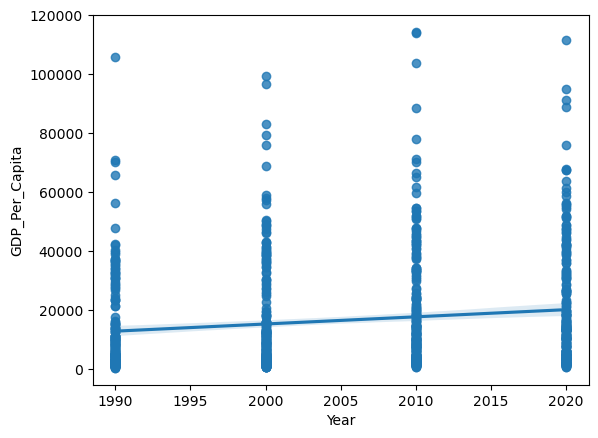

In [26]:
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

11. Which country was the first to have a GDP per capita greater than $100,000?
        
        United Arab Emirates is the first country to have a GDP per capita at $100,000

In [28]:
over_100k = gdp[gdp.GDP_Per_Capita >= 100000]
over_100k = over_100k.sort_values('Year')
print(over_100k)

                   Country  Year  GDP_Per_Capita
7302  United Arab Emirates  1990   105893.626059
7301  United Arab Emirates  1991   101048.696239
7295  United Arab Emirates  1997   100956.706467
4167            Luxembourg  2001   101143.147977
4166            Luxembourg  2002   103317.331098
4165            Luxembourg  2003   104743.000088
4164            Luxembourg  2004   107634.837198
4163            Luxembourg  2005   108632.360016
4162            Luxembourg  2006   113346.035782
4161            Luxembourg  2007   120647.822959
4160            Luxembourg  2008   118154.667184
4159            Luxembourg  2009   112230.081410
5756                 Qatar  2010   103902.519310
4158            Luxembourg  2010   114343.988089
4191      Macao SAR, China  2010   114042.495308
4190      Macao SAR, China  2011   135365.387353
5755                 Qatar  2011   111879.747777
4157            Luxembourg  2011   112998.390477
4189      Macao SAR, China  2012   144891.341893
5754                

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [30]:
print(year_2020.sort_values('GDP_Per_Capita', ascending=False))

                       Country  GDP_Per_Capita
4148                Luxembourg   111751.314751
6108                 Singapore    94910.101431
3279                   Ireland    91356.855054
5746                     Qatar    89019.069857
681                    Bermuda    76117.804744
...                        ...             ...
5074                     Niger     1214.546556
6273                   Somalia     1127.418534
1630           Dem. Rep. Congo     1044.071214
1217  Central African Republic      847.765012
973                    Burundi      711.355263

[242 rows x 2 columns]


In [31]:
lux_gdp = gdp[gdp.Country == 'Luxembourg']
print(lux_gdp)

         Country  Year  GDP_Per_Capita
4146  Luxembourg  2022   115541.774828
4147  Luxembourg  2021   115683.493708
4148  Luxembourg  2020   111751.314751
4149  Luxembourg  2019   114542.496934
4150  Luxembourg  2018   114164.468558
4151  Luxembourg  2017   114985.842236
4152  Luxembourg  2016   116283.699681
4153  Luxembourg  2015   113182.728563
4154  Luxembourg  2014   113313.578898
4155  Luxembourg  2013   113050.663254
4156  Luxembourg  2012   112137.135491
4157  Luxembourg  2011   112998.390477
4158  Luxembourg  2010   114343.988089
4159  Luxembourg  2009   112230.081410
4160  Luxembourg  2008   118154.667184
4161  Luxembourg  2007   120647.822959
4162  Luxembourg  2006   113346.035782
4163  Luxembourg  2005   108632.360016
4164  Luxembourg  2004   107634.837198
4165  Luxembourg  2003   104743.000088
4166  Luxembourg  2002   103317.331098
4167  Luxembourg  2001   101143.147977
4168  Luxembourg  2000    99301.526999
4169  Luxembourg  1999    94115.384035
4170  Luxembourg  1998   

<Axes: xlabel='Year'>

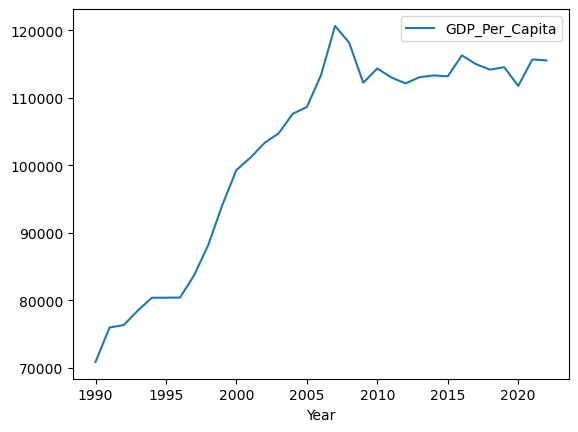

In [32]:
lux_gdp.plot.line(x='Year', y='GDP_Per_Capita')

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [34]:
print(year_2020.sort_values('GDP_Per_Capita'))

                       Country  GDP_Per_Capita
973                    Burundi      711.355263
1217  Central African Republic      847.765012
1630           Dem. Rep. Congo     1044.071214
6273                   Somalia     1127.418534
5074                     Niger     1214.546556
...                        ...             ...
681                    Bermuda    76117.804744
5746                     Qatar    89019.069857
3279                   Ireland    91356.855054
6108                 Singapore    94910.101431
4148                Luxembourg   111751.314751

[242 rows x 2 columns]


In [35]:
bur_gdp = gdp[gdp.Country == 'Burundi']
print(bur_gdp)

      Country  Year  GDP_Per_Capita
971   Burundi  2022      708.178317
972   Burundi  2021      714.066712
973   Burundi  2020      711.355263
974   Burundi  2019      729.658463
975   Burundi  2018      740.448223
976   Burundi  2017      750.787616
977   Burundi  2016      764.336602
978   Burundi  2015      781.579287
979   Burundi  2014      831.294839
980   Burundi  2013      824.610523
981   Burundi  2012      814.320771
982   Burundi  2011      807.664958
983   Burundi  2010      804.354941
984   Burundi  2009      801.803427
985   Burundi  2008      812.592170
986   Burundi  2007      807.447481
987   Burundi  2006      809.696011
988   Burundi  2005      796.108713
989   Burundi  2004      818.746063
990   Burundi  2003      810.552335
991   Burundi  2002      846.747295
992   Burundi  2001      833.670879
993   Burundi  2000      837.348411
994   Burundi  1999      862.006680
995   Burundi  1998      891.699844
996   Burundi  1997      867.284265
997   Burundi  1996      880

<Axes: xlabel='Year'>

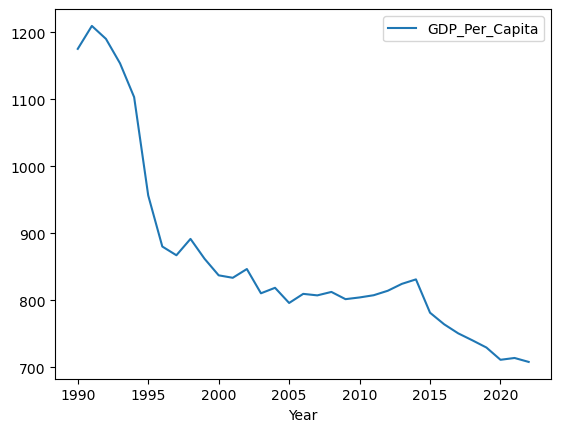

In [36]:
bur_gdp.plot.line(x='Year', y='GDP_Per_Capita')

**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [38]:
year_1990 = gdp[gdp.Year == 1990]
year_1990 = year_1990.drop(columns=['Year'])
gdp_9020 = pd.merge(year_1990, year_2020, how='inner', on='Country')
gdp_9020 = gdp_9020.sort_values('Country')
gdp_9020 = gdp_9020.rename(columns={'GDP_Per_Capita_x':'GDP_1990', 'GDP_Per_Capita_y':'GDP_2020'})
gdp_9020['gdp_diff'] = gdp_9020.GDP_1990 - gdp_9020.GDP_2020
gdp_decline = gdp_9020[gdp_9020.gdp_diff > 0]
print(gdp_decline)

                                      Country       GDP_1990      GDP_2020  \
15                                   Barbados   14097.395550  13805.777541   
25                                     Brunei   70358.724094  61603.550804   
28                                    Burundi    1175.155086    711.355263   
34                   Central African Republic    1200.613390    847.765012   
41                                      Congo    5007.319245   3384.654335   
45                            Dem. Rep. Congo    1750.169739   1044.071214   
66   Fragile and conflict affected situations    4864.814075   4357.621312   
68                                      Gabon   17559.006114  13903.288955   
76                              Guinea-Bissau    1998.173206   1803.630591   
78                                      Haiti    3612.815105   2970.462845   
99                                   Kiribati    2045.272278   1897.061922   
101                           Kyrgyz Republic    5158.317569   4

In [39]:
print(gdp_9020)

                         Country     GDP_1990      GDP_2020     gdp_diff
0    Africa Eastern and Southern  3037.297466   3455.023119  -417.725653
1     Africa Western and Central  2788.301039   3957.933804 -1169.632765
2                        Albania  4827.027705  13278.369769 -8451.342064
3                        Algeria  8828.874473  10844.770764 -2015.896290
4                         Angola  5793.084512   6029.691895  -236.607383
..                           ...          ...           ...          ...
202                      Vanuatu  2774.138350   2848.970240   -74.831890
203                     Viet Nam  2099.394649  10450.622382 -8351.227733
204                        World  9705.981267  16204.169107 -6498.187839
205                       Zambia  2290.039226   3183.650773  -893.611547
206                     Zimbabwe  2704.757299   1990.319419   714.437880

[207 rows x 4 columns]


In [40]:
avg_1990 = gdp_9020['GDP_1990'].mean()
avg_2020 = gdp_9020['GDP_2020'].mean()
print(avg_1990)
print(avg_2020)
med_1990 = gdp_9020['GDP_1990'].median()
med_2020 = gdp_9020['GDP_2020'].median()
print(med_1990)
print(med_2020)
#GDP in 2020 is higher by average and its median

12506.08837386169
18820.10433612192
6223.452993900737
12815.909590529323


14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.
15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.
16. Look at the number of observations in this dataset per year. What do you notice?

    The number of countries and years do not match the number of values for internet user %

In [42]:
internet_df = pd.read_csv(r'C:\da12\projects\un-python-Zavello\data\internet_use.csv', nrows=6083)

In [43]:
internet_df.head()
#internet_df.info()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [44]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


In [45]:
internet_df = internet_df.drop(columns=['Value Footnotes'])
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'Internet_Users_Pct'})
print(internet_df.head())
print(internet_df.tail())

       Country  Year  Internet_Users_Pct
0  Afghanistan  2019               17.60
1  Afghanistan  2018               16.80
2  Afghanistan  2017               13.50
3  Afghanistan  2016               11.00
4  Afghanistan  2015                8.26
       Country  Year  Internet_Users_Pct
6078  Zimbabwe  1997            0.033080
6079  Zimbabwe  1996            0.016790
6080  Zimbabwe  1995            0.007684
6081  Zimbabwe  1994            0.001739
6082  Zimbabwe  1990            0.000000


17. What is the first year to have a non-zero internet users percentage value?

    2013 is the first year with non-zero internet users

In [47]:
int_by_year = internet_df.drop(columns=['Country'])
int_by_year = internet_df.groupby('Year').min('Internet_Users_Pct')
int_by_year = int_by_year.dropna()
int_by_year = int_by_year.sort_values('Internet_Users_Pct')
int_by_year = int_by_year[int_by_year.Internet_Users_Pct > 0]
print(int_by_year)

      Internet_Users_Pct
Year                    
2013             0.90000
2014             0.99000
2015             1.08373
2016             1.17712
2017             2.00405
2018             4.00000
2019             6.10000
2020             7.40000
2021             9.64241
2022            11.27500
2023            44.50270


18. How does the distribution of internet users percent differ for 2000 and 2014?

<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

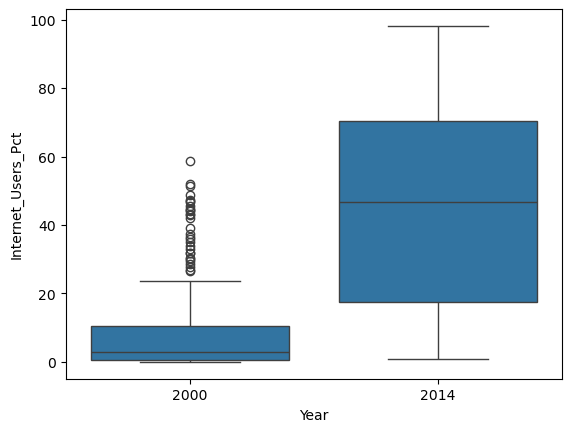

In [49]:
int_2000 = internet_df[internet_df.Year == 2000]
# int_2000 = int_2000.drop(columns=['Year'])
int_2014 = internet_df[internet_df.Year == 2014]
# int_2014 = int_2014.drop(columns=['Year'])
int_0014 = pd.concat((int_2000, int_2014))
sns.boxplot(x='Year', y='Internet_Users_Pct', data=int_0014)

19. For how many countries was the percentage of internet users below 5% in 2014?

    10 countries below 5% in 2014

In [51]:
int_2014_low = int_2014[int_2014.Internet_Users_Pct < 5]
int_2014_low.count()

Country               10
Year                  10
Internet_Users_Pct    10
dtype: int64

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [53]:
gdp_and_internet_use = gdp.merge(internet_df, how='outer', on=['Country', 'Year'])
gdp_and_internet_use.info()
gdp_and_internet_use

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9112 entries, 0 to 9111
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             9112 non-null   object 
 1   Year                9112 non-null   int64  
 2   GDP_Per_Capita      7662 non-null   float64
 3   Internet_Users_Pct  6083 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 284.9+ KB


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2001,NaN,0.004723
2,Afghanistan,2002,1280.463171,0.004561
3,Afghanistan,2003,1292.333437,0.087891
4,Afghanistan,2004,1260.060581,0.105809
...,...,...,...,...
9107,Zimbabwe,2018,2399.621551,25.000000
9108,Zimbabwe,2019,2203.396810,26.588300
9109,Zimbabwe,2020,1990.319419,29.298600
9110,Zimbabwe,2021,2115.144555,32.461600


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [55]:
gdp_internet_2014 = gdp_and_internet_use[gdp_and_internet_use.Year == 2014]
gdp_internet_2014 = gdp_internet_2014.sort_values('Internet_Users_Pct', ascending=False)
print(gdp_internet_2014)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
3820                      Iceland  2014    50450.741612             98.1580
2780  Falkland (Malvinas) Islands  2014             NaN             97.6000
794                       Bermuda  2014    77361.104881             96.8000
6243                       Norway  2014    62838.515727             96.3005
2100                      Denmark  2014    52048.335493             95.9935
...                           ...   ...             ...                 ...
8450     Turks and Caicos Islands  2014    24661.145053                 NaN
8516                     TÃ¼rkiye  2014    24600.518215                 NaN
8746          Upper middle income  2014    14063.487284                 NaN
8978           West Bank and Gaza  2014     5967.073437                 NaN
9011                        World  2014    15120.730322                 NaN

[284 rows x 4 columns]


In [56]:
q21_df = gdp_and_internet_use[(gdp_and_internet_use['Country'] == 'Iceland') | (gdp_and_internet_use['Country'] == 'Falkland (Malvinas) Islands') | (gdp_and_internet_use['Country'] == 'Bermuda')]
print(q21_df)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
770   Bermuda  1990    65961.406278              0.0000
771   Bermuda  1991    63958.896254                 NaN
772   Bermuda  1992    64385.407410                 NaN
773   Bermuda  1993    65967.850014                 NaN
774   Bermuda  1994    65904.720421                 NaN
...       ...   ...             ...                 ...
3824  Iceland  2018    56816.566601             99.0110
3825  Iceland  2019    56584.168683             99.5049
3826  Iceland  2020    51641.392081             99.5328
3827  Iceland  2021    53003.170408             99.6870
3828  Iceland  2022    55033.265180             99.8565

[89 rows x 4 columns]


C:\Users\zecha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


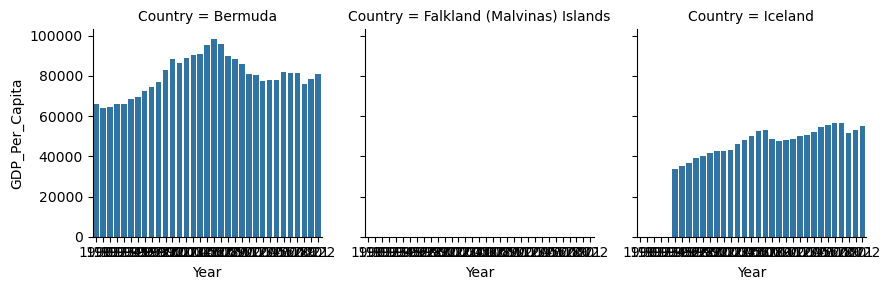

In [57]:
g = sns.FacetGrid(q21_df, col='Country')
g.map(sns.barplot, 'Year', 'GDP_Per_Capita')

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.
23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

In [59]:
gdp_internet_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3820,Iceland,2014,50450.741612,98.1580
2780,Falkland (Malvinas) Islands,2014,NaN,97.6000
794,Bermuda,2014,77361.104881,96.8000
6243,Norway,2014,62838.515727,96.3005
2100,Denmark,2014,52048.335493,95.9935
...,...,...,...,...
8450,Turks and Caicos Islands,2014,24661.145053,NaN
8516,TÃ¼rkiye,2014,24600.518215,NaN
8746,Upper middle income,2014,14063.487284,NaN
8978,West Bank and Gaza,2014,5967.073437,NaN


Text(0.5, 1.0, 'GDP Per Capita Vs Internet Usage Percentage')

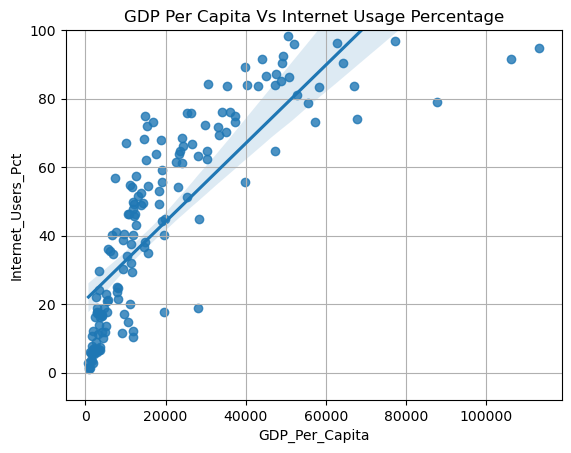

In [60]:
q_23 = sns.regplot(x=gdp_internet_2014['GDP_Per_Capita'], y=gdp_internet_2014['Internet_Users_Pct'])
plt.grid()
q_23.set(ylim=(None, 100))
plt.title('GDP Per Capita Vs Internet Usage Percentage')

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [181]:
gdp_2014 = gdp[gdp.Year == 2014]
gdp_2014 = gdp_2014.drop(columns=['Year'])
gdp_2014['GDP_group'] = pd.qcut(gdp_2014.GDP_Per_Capita, 3, labels=['Low', 'Medium', 'High'])
print(gdp_2014)

                          Country  GDP_Per_Capita GDP_group
7                     Afghanistan     2144.449634       Low
28    Africa Eastern and Southern     3642.875373       Low
61     Africa Western and Central     4146.994622       Low
94                        Albania    11586.817446    Medium
127                       Algeria    11561.259795    Medium
...                           ...             ...       ...
7509                     Viet Nam     7641.909252    Medium
7542           West Bank and Gaza     5967.073437       Low
7571                        World    15120.730322    Medium
7604                       Zambia     3375.941270       Low
7637                     Zimbabwe     2316.954536       Low

[242 rows x 3 columns]


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [184]:
print(int_2014)

                  Country  Year  Internet_Users_Pct
5             Afghanistan  2014              7.0000
28                Albania  2014             54.3000
57                Algeria  2014             29.5000
87                Andorra  2014             86.1000
114                Angola  2014             21.3623
...                   ...   ...                 ...
5937             Viet Nam  2014             41.0000
5960  Virgin Islands (US)  2014             50.0700
6003                Yemen  2014             22.5500
6031               Zambia  2014              6.5000
6061             Zimbabwe  2014             16.3647

[204 rows x 3 columns]


,Year,Internet_Users_Pct
count,204.0,204.000000
mean,2014.0,45.604925
std,0.0,29.295667
min,2014.0,0.990000
25%,2014.0,17.403300
50%,2014.0,46.818000
75%,2014.0,70.262500
max,2014.0,98.158000


In [202]:
gdp_internet_2014 = gdp_2014.merge(int_2014, how='left', on='Country')
gdp_internet_2014 = gdp_internet_2014.drop(columns=['Year'])
print(gdp_internet_2014)

                         Country  GDP_Per_Capita GDP_group  Internet_Users_Pct
0                    Afghanistan     2144.449634       Low              7.0000
1    Africa Eastern and Southern     3642.875373       Low                 NaN
2     Africa Western and Central     4146.994622       Low                 NaN
3                        Albania    11586.817446    Medium             54.3000
4                        Algeria    11561.259795    Medium             29.5000
..                           ...             ...       ...                 ...
237                     Viet Nam     7641.909252    Medium             41.0000
238           West Bank and Gaza     5967.073437       Low                 NaN
239                        World    15120.730322    Medium                 NaN
240                       Zambia     3375.941270       Low              6.5000
241                     Zimbabwe     2316.954536       Low             16.3647

[242 rows x 4 columns]


In [206]:
gdp_internet_2014.groupby('GDP_group')['Internet_Users_Pct'].median()

C:\Users\zecha\AppData\Local\Temp\ipykernel_22444\2748958929.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdp_internet_2014.groupby('GDP_group')['Internet_Users_Pct'].median()


GDP_group
Low       11.0000
Medium    45.8752
High      75.9800
Name: Internet_Users_Pct, dtype: float64